In [1]:
# import libraries
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

%matplotlib inline

In [2]:
DATA_Path = '/home/aaranyak/Documents/ml_projects/ml_projects/Disease Prediction using ML/Testing.csv'
df = pd.read_csv(DATA_Path)

In [3]:
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


In [4]:
df.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [5]:
df.dropna(axis=1)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Peptic ulcer diseae
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,AIDS
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Diabetes
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Gastroenteritis
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Bronchial Asthma


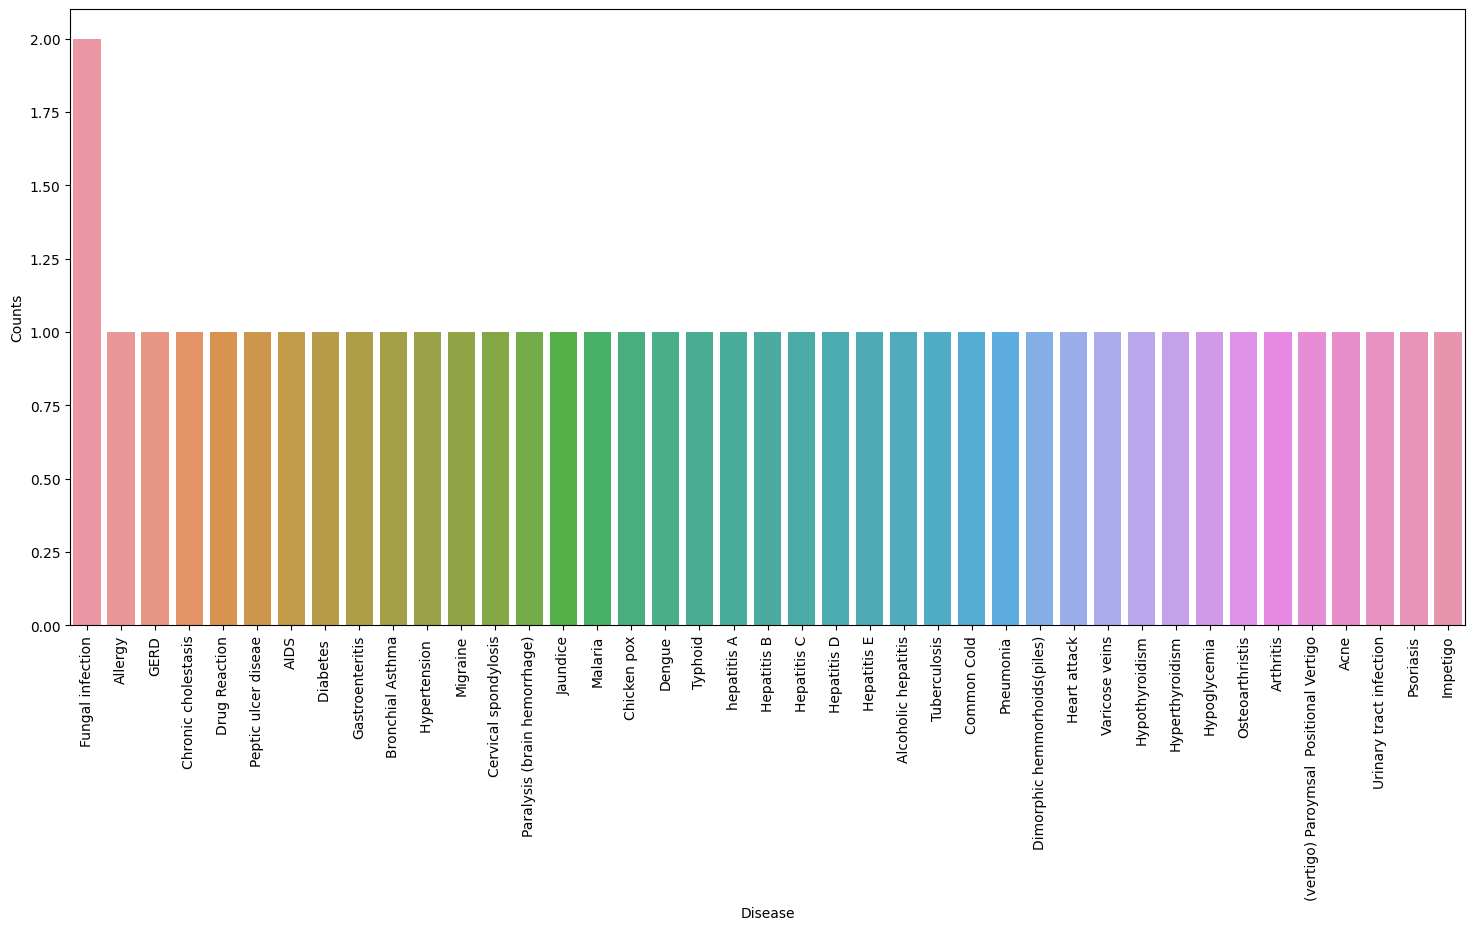

In [6]:
# checking whether the dataset is balanced or not.

disease_counts = df['prognosis'].value_counts()
temp_df = pd.DataFrame({"Disease":disease_counts.index,"Counts":disease_counts.values})

plt.figure(figsize=(18,8))
sns.barplot(x = "Disease",y = "Counts",data = temp_df)
plt.xticks(rotation=90)
plt.show()

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
itching,42.0,0.166667,0.377195,0.0,0.0,0.0,0.0,1.0
skin_rash,42.0,0.190476,0.397437,0.0,0.0,0.0,0.0,1.0
nodal_skin_eruptions,42.0,0.023810,0.154303,0.0,0.0,0.0,0.0,1.0
continuous_sneezing,42.0,0.047619,0.215540,0.0,0.0,0.0,0.0,1.0
shivering,42.0,0.023810,0.154303,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
small_dents_in_nails,42.0,0.023810,0.154303,0.0,0.0,0.0,0.0,1.0
inflammatory_nails,42.0,0.023810,0.154303,0.0,0.0,0.0,0.0,1.0
blister,42.0,0.023810,0.154303,0.0,0.0,0.0,0.0,1.0
red_sore_around_nose,42.0,0.047619,0.215540,0.0,0.0,0.0,0.0,1.0


In [8]:
df.shape

(42, 133)

The prognosis column is of object datatype so we will convert that into numerical type.

In [9]:
# Label Encoding
encoder = LabelEncoder()
df['prognosis'] = encoder.fit_transform(df['prognosis'])